## The Titanic Data - Classification Task
1.class    2.survival    3.age    4.name    5.siblings/spouse    6.parents/child    7.ticket number    8.fare    9.cabin    10.embarked from    11.lifeboat    12.body ID    13.destination

**IMPORTING MODULES AND LOADING DATASET**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [2]:
data = pd.read_excel("titanic.xls")

In [3]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**EXPLORATORY DATA ANALYSIS**

In [4]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


**MISSING VALUES AND THEIR %S**

In [6]:
data.isnull().sum().sort_values(ascending=False)

body         1188
cabin        1014
boat          823
home.dest     564
age           263
embarked        2
fare            1
ticket          0
parch           0
sibsp           0
sex             0
name            0
survived        0
pclass          0
dtype: int64

In [7]:
percentage = data.isnull().sum()/data.isnull().count()*100
percentage = (round(percentage, 1)).sort_values(ascending=False)
percentage.head()

body         90.8
cabin        77.5
boat         62.9
home.dest    43.1
age          20.1
dtype: float64

**PIVOTING FEATURES**

In [8]:
data[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.619195
1,2,0.429603
2,3,0.255289


In [9]:
data[['sex', 'survived']].groupby(['sex'], as_index=False).mean().sort_values(by='sex', ascending=False)

,sex,survived
1,male,0.190985
0,female,0.727468


In [10]:
data[['sibsp', 'survived']].groupby(['sibsp'], as_index=False).mean().sort_values(by='sibsp', ascending=False)

,sibsp,survived
6,8,0.000000
5,5,0.000000
4,4,0.136364
3,3,0.300000
2,2,0.452381
1,1,0.510972
0,0,0.346801


In [11]:
data[['parch', 'survived']].groupby(['parch'], as_index=False).mean().sort_values(by='parch', ascending=False)

,parch,survived
7,9,0.000000
6,6,0.000000
5,5,0.166667
4,4,0.166667
3,3,0.625000
2,2,0.504425
1,1,0.588235
0,0,0.335329


**VISUALIZATION**

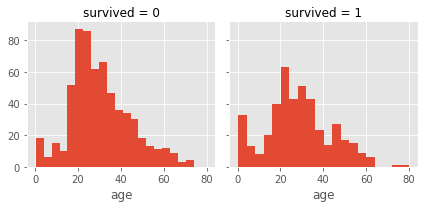

In [12]:
g = sns.FacetGrid(data, col='survived')
g.map(plt.hist, 'age', bins=20)

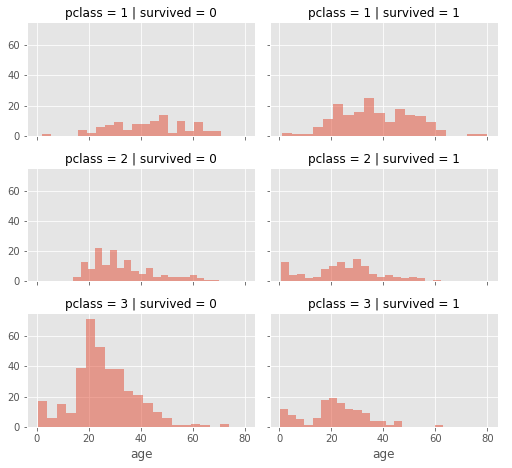

In [13]:
grid = sns.FacetGrid(data, col='survived', row='pclass', height=2.2,aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\Mukiri\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Mukiri\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


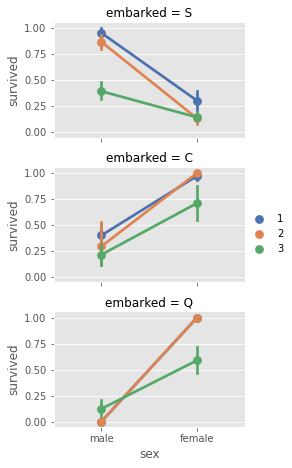

In [14]:
grid = sns.FacetGrid(data, row='embarked', height=2.2, aspect=1.6)
#grid.map(sns.pointplot, 'sex', 'survived', 'pclass', palette='deep',  order=[1,2,3], hue_order=["female","male"])
grid.map(sns.pointplot, 'sex', 'survived', 'pclass', palette='deep')
grid.add_legend()

C:\Users\Mukiri\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


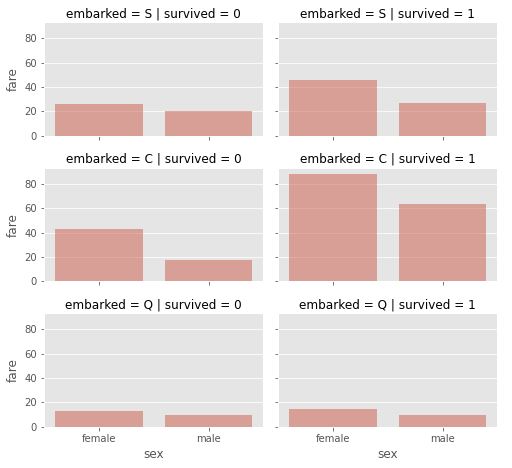

In [15]:
grid = sns.FacetGrid(data, row='embarked', col='survived', height=2.2, aspect=1.6)
#grid.map(sns.barplot, 'sex', 'fare', alpha=.5, ci=None, order=[1,2,3], hue_order=["female","male"])
grid.map(sns.barplot, 'sex', 'fare', alpha=.5, ci=None)
grid.add_legend()

**DATA PREPROCESSING**

**NAME**

**1. Extract titles from name and establish correlation with survival**

**2. Classify titles that are not as recurrent as rare**

**3. Regroup some into their other groups**

**4. Map the titles**

**5. Drop name column**

In [16]:
for i in data:
    data['title'] = data.name.str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(data['title'], data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [17]:
#rare ['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir']
for i in data:
    data['title'] = data['title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Rare')

In [18]:
#regroup [Mlle - Miss, Mme - Mrs, Ms - Miss]
data['title'] = data['title'].replace('Mlle', 'Miss')
data['title'] = data['title'].replace('Mme', 'Mrs')
data['title'] = data['title'].replace('Ms', 'Miss')

In [19]:
data[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Master,0.508197
1,Miss,0.678030
2,Mr,0.162483
3,Mrs,0.787879
4,Rare,0.379310


In [20]:
data['title'].isnull().sum()

0

In [21]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
data['title'] = data['title'].map(title_mapping)

In [22]:
data= data.drop(['name'], axis=1)
data.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",2
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3


**SEX**

**Convert Female = 1 and Male = 0 as integers**

In [23]:
data['sex'] = data['sex'].map({'female':1, 'male':0}).astype(int)
data.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",2
1,1,1,0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4
2,1,0,1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2
3,1,0,0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3


**AGE**

**Fill in age**

In [24]:
for i in data:
    mean = data['age'].mean()
    std = data['age'].std()
    is_null = data['age'].isnull().sum()
    
    #compute random numbers between mean, std, is_null
    rand_age = np.random.randint(mean-std, mean+std, size=is_null)
    
    #fill in NaN values
    age_slice = data['age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    data['age'] = age_slice
data['age'] = data['age'].astype(int)    
    
data['age'].isnull().sum()

0

**CABIN**

**Create new feature showing deck, convert to a num variable and fill in missing values with 0.**

**and drop the cabin column**

In [25]:
import re
deck = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'U':8}
data['cabin'] = data['cabin'].fillna('UO')
data['deck'] = data['cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())
data['deck'] = data['deck'].map(deck)
data['deck'] = data['deck'].fillna(0)
data['deck'] = data['deck'].astype(int)



data= data.drop(['cabin'], axis=1)

**EMBARKED**

**Has two missing values. Fill in.**

**[S, C, Q]  Convert to numeric through mapping.**

In [26]:
data['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [27]:
#Fill in with common value s
top_value = 'S'
for i in data:
    data['embarked'] = data['embarked'].fillna(top_value)
data['embarked'].isnull().sum()

0

In [28]:
ports = {'S':1, 'C':2, 'Q':3}
data['embarked'] = data['embarked'].map(ports)

**FARE**

**Fill in missing values and convert to int**

In [29]:
data['fare'].isnull().sum()

1

In [30]:
data['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [31]:
for i in data:
    data['fare'] = data['fare'].fillna(0)
    data['fare'] = data['fare'].astype(int)
    
data['fare'].isnull().sum()

0

**TICKET**

**Drop the ticket column as unuseful.**

In [32]:
data = data.drop(['ticket'], axis=1)

**BODY**

**Drop body column as unuseful**

In [33]:
data = data.drop(['body'], axis=1)

In [34]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,home.dest,title,deck
0,1,1,1,29,0,0,211,1,2,"St Louis, MO",2,2
1,1,1,0,0,1,2,151,1,11,"Montreal, PQ / Chesterville, ON",4,3
2,1,0,1,2,1,2,151,1,NaN,"Montreal, PQ / Chesterville, ON",2,3
3,1,0,0,30,1,2,151,1,NaN,"Montreal, PQ / Chesterville, ON",1,3
4,1,0,1,25,1,2,151,1,NaN,"Montreal, PQ / Chesterville, ON",3,3


**CREATE NEW FEATURES**

**AGE GROUP** - FROM AGE

In [35]:
data.loc[data['age'] <= 16, 'age'] = 0
data.loc[(data['age'] > 16) & (data['age'] <= 32), 'age'] = 1
data.loc[(data['age'] > 32) & (data['age'] <= 48), 'age'] = 2
data.loc[(data['age'] > 48) & (data['age'] <= 64), 'age'] = 3
data.loc[data['age'] > 64, 'age'] = 4 
    
data['age'] = data['age'].astype(int)
data['age'].value_counts() 

1    664
2    373
0    153
3    106
4     13
Name: age, dtype: int64

**FARE GROUPS** - FROM FARE

In [36]:

data.loc[data['fare'] <= 7.91, 'fare'] = 0
data.loc[(data['fare'] > 7.91) & (data['fare'] <= 14.454), 'fare'] = 1
data.loc[(data['fare'] > 14.454) & (data['fare'] <= 31), 'fare'] = 2
data.loc[(data['fare'] > 31) & (data['fare'] <= 99), 'fare'] = 3
data.loc[(data['fare'] >99) & (data['fare'] <= 250), 'fare'] = 4
data.loc[data['fare'] > 250, 'fare'] = 5
    
    
data['fare'] = data['fare'].astype(int)
data['fare'].value_counts()

0    361
2    325
1    312
3    227
4     67
5     17
Name: fare, dtype: int64

**FAMILY** - FROM PARCH (PARENT CHILD) AND SIBSP (SIBLING SPOUSE)

**Not_alone shows that the person has company.**

In [37]:
data['family'] = data['sibsp'] + data['parch']
data.loc[data['family'] > 0, 'not_alone'] = 0
data.loc[data['family'] == 0, 'not_alone'] = 1
data['not_alone'] = data['not_alone'].astype(int)
data['not_alone'].value_counts()

1    790
0    519
Name: not_alone, dtype: int64

**HOME.DEST**

**Drop column**

In [38]:
data = data.drop(['home.dest'], axis=1)

**BOAT**

**Drop column**

In [39]:
data = data.drop(['boat'], axis=1)

In [40]:
data.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title,deck,family,not_alone
0,1,1,1,1,0,0,4,1,2,2,0,1
1,1,1,0,0,1,2,4,1,4,3,3,0
2,1,0,1,0,1,2,4,1,2,3,3,0
3,1,0,0,1,1,2,4,1,1,3,3,0
4,1,0,1,1,1,2,4,1,3,3,3,0
5,1,1,0,2,0,0,2,1,1,5,0,1
6,1,1,1,3,1,0,3,1,2,4,1,0
7,1,0,0,2,0,0,0,1,1,1,0,1
8,1,1,1,3,2,0,3,1,3,3,2,0
9,1,0,0,4,0,0,3,2,1,0,0,1


**SPLIT, TEST AND TRAIN**

In [41]:
X, y = data.loc[:, data.columns != 'survived'], data['survived']

from sklearn.model_selection import train_test_split
# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [42]:
print(X_train[ :5])

     pclass  sex  age  sibsp  parch  fare  embarked  title  deck  family  \
380       2    1    1      0      0     1         1      3     6       0   
86        1    0    3      0      0     2         1      1     5       0   
123       1    0    3      1      1     3         2      1     2       2   
221       1    0    4      0      1     3         2      1     2       1   
286       1    1    3      1      0     4         1      3     3       1   

     not_alone  
380          1  
86           1  
123          0  
221          0  
286          0  


**MODELING**

**Stochastic Gradient Descent**

In [43]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train), 2)

print (acc_sgd)

0.77


**Perceptron**

In [44]:
perceptron = Perceptron(max_iter=10)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

perceptron.score(X_train, y_train)

acc_perceptron = round(perceptron.score(X_train, y_train), 2)

print(acc_perceptron)

0.77


**Gaussian Naive Bayes**

In [45]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

gaussian.score(X_train, y_train)

acc_gaussian = round(gaussian.score(X_train, y_train), 2)

print(acc_gaussian)

0.78


**Random Forest**

In [46]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest= round(random_forest.score(X_train, y_train), 2)

print(acc_random_forest)

0.89


**Decision Tree**

In [47]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

decision_tree.score(X_train, y_train)

acc_decision_tree = round(decision_tree.score(X_train, y_train), 2)

print(acc_decision_tree)

0.89


**Logistic Regression**

In [48]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

log.score(X_train, y_train)

acc_log = round(log.score(X_train, y_train), 2)

print(acc_log)

0.81


**Linear SVM**

In [49]:
linear_svc = LinearSVC(max_iter=400)
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)

linear_svc.score(X_train, y_train)

acc_linear_svc = round(linear_svc.score(X_train, y_train), 2)

print(acc_linear_svc)

0.81


C:\Users\Mukiri\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


**KNN**

In [50]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn.score(X_train, y_train)

acc_knn = round(knn.score(X_train, y_train), 2)

print(acc_knn)

0.8


**RESULTS**

In [51]:
results = pd.DataFrame({'Model':['SGD', 'Perceptron', 'Gaussian NB', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'Linear SVM', 'KNN'], 
                       'Score':[acc_sgd, acc_perceptron, acc_gaussian, acc_random_forest, acc_decision_tree, acc_log, acc_linear_svc, acc_knn]})
result_df = results.sort_values(by="Score", ascending=False)
result_df.head(9)

,Model,Score
3,Random Forest,0.89
4,Decision Tree,0.89
5,Logistic Regression,0.81
6,Linear SVM,0.81
7,KNN,0.80
2,Gaussian NB,0.78
0,SGD,0.77
1,Perceptron,0.77


**IMPROVE RANDOM FOREST PERFORMANCE**

CROSS VALIDATION - K-FOLD

In [52]:
from sklearn.model_selection import cross_val_score
r = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(r, X_train, y_train, cv=4, scoring='accuracy')

print('Scores:', scores)
print('Mean:', scores.mean())
print('Standard deviation:', scores.std())

Scores: [0.80677966 0.77966102 0.80952381 0.7755102 ]
Mean: 0.792868672892886
Standard deviation: 0.015383983406304846


FEATURE IMPORTANCE

In [53]:
importance = pd.DataFrame({'feature':X_train.columns, 
                   'importance':np.round(random_forest.feature_importances_,
                                        3)})
importance.sort_values('importance',ascending=False).set_index('feature')


importance.head(11)

,feature,importance
0,pclass,0.090
1,sex,0.167
2,age,0.090
3,sibsp,0.044
4,parch,0.035
5,fare,0.098
6,embarked,0.056
7,title,0.245
8,deck,0.098
9,family,0.065


<AxesSubplot:>

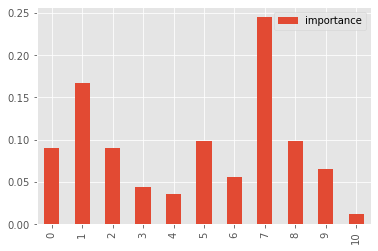

In [54]:
importance.plot.bar()

DROP THE LEAST IMPORTANT COLUMNS [FAMILY, NOT_ALONE]

In [55]:
X_train = X_train.drop('not_alone', axis=1)
X_train = X_train.drop('family', axis=1)
X_test = X_test.drop('not_alone', axis=1)
X_test = X_test.drop('family', axis=1)


print(X_train[ :5])

     pclass  sex  age  sibsp  parch  fare  embarked  title  deck
380       2    1    1      0      0     1         1      3     6
86        1    0    3      0      0     2         1      1     5
123       1    0    3      1      1     3         2      1     2
221       1    0    4      0      1     3         2      1     2
286       1    1    3      1      0     4         1      3     3


TEST RANDOM FOREST 

In [56]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train),2)

print(acc_random_forest)

0.89
